In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [49]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
houses = pd.read_csv('/Users/rachyc/Desktop/kc_house_data.csv')

In [51]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
houses['date'] = pd.to_datetime(houses['date'])


In [53]:
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [54]:
houses['renovated'] = houses['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [55]:
df_selected = houses.drop('date', axis=1)

In [56]:
def view(x):
    if x == 0 or x == 1:
        return 'Poor View'
    elif x == 2 and x == 3:
        return 'Average View'
    else:
        return 'Excellent View'

In [57]:
def condition(x):
    if x == 1 or x == 2:
        return 'Poor Condition'
    elif x == 3:
        return 'Average Condition'
    else:
        return 'Excellent Condition'

In [58]:
def grade(x):
    if 1<=x<=3:
        return 'Poor Quality'
    elif 4<=x<=10:
        return 'Average Quality'
    else:
        return 'Excellent Quality'

In [59]:
houses['view_score'] = houses['view'].apply(view)

In [60]:
houses['condition_score'] = houses['condition'].apply(condition)

In [61]:
houses['quality_score'] = houses['grade'].apply(grade)

In [62]:
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,view_score,condition_score,quality_score
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,0,Poor View,Average Condition,Average Quality
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,1,Poor View,Average Condition,Average Quality
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,0,Poor View,Average Condition,Average Quality
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,0,Poor View,Excellent Condition,Average Quality
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,0,Poor View,Average Condition,Average Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,0,Poor View,Average Condition,Average Quality
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,0,Poor View,Average Condition,Average Quality
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,0,Poor View,Average Condition,Average Quality
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,0,Poor View,Average Condition,Average Quality


In [63]:
zipcode_dummies = pd.get_dummies(houses['zipcode'], prefix='zipcode')

In [64]:
houses = pd.concat([houses, zipcode_dummies], axis=1)

In [65]:
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,True,False,False,False,False,False,False,False,False,False
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False


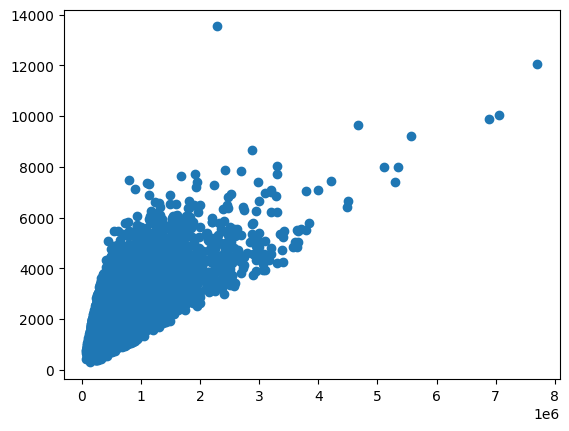

In [66]:
plt.scatter(houses['price'],houses['sqft_living'])

<Axes: xlabel='grade'>

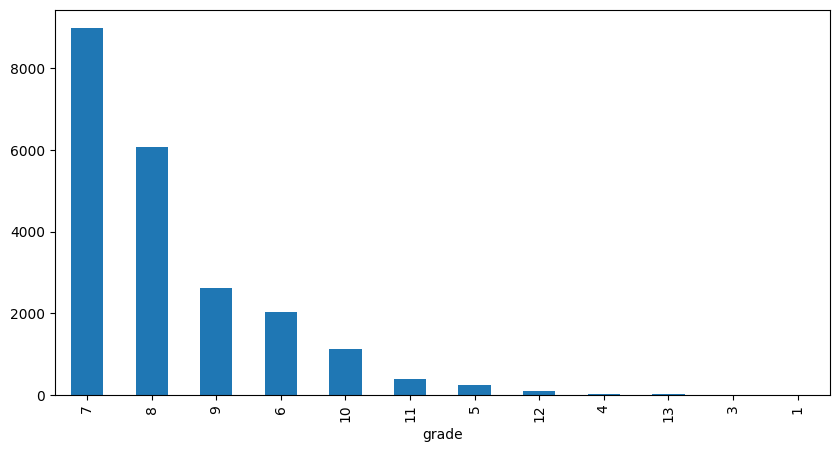

In [67]:
houses.groupby('grade')['price'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [68]:
results = ols("price ~ sqft_living + sqft_living15 + sqft_lot15 + grade + floors + waterfront + condition + bedrooms + bathrooms + view", data=houses).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3328.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:01:37   Log-Likelihood:            -2.9753e+05
No. Observations:               21613   AIC:                         5.951e+05
Df Residuals:                   21602   BIC:                         5.952e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.761e+05   1.73e+04    -39.174

In [69]:
pred_vals = results.predict(houses[['sqft_living','sqft_living15','sqft_lot15','grade','condition','bedrooms','bathrooms','floors','view','waterfront']])

In [70]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),houses['price']], axis=1)


In [71]:
res

,y_hat,price
0,290439.646353,221900.0
1,535990.457755,538000.0
2,152033.974042,180000.0
3,496653.088831,604000.0
4,477599.017763,510000.0
...,...,...
21608,417498.232744,360000.0
21609,547662.551209,400000.0
21610,283508.636792,402101.0
21611,444462.465495,400000.0


In [72]:
res['error'] = res['y_hat'] - res['price']

In [73]:
res.head(1)

,y_hat,price,error
0,290439.646353,221900.0,68539.646353


In [74]:
res['sq_error'] = res['error']**2

In [75]:
np.sqrt(res['sq_error'].mean())

230330.15485550824

In [76]:
houses.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.042289
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.201253


(array([3.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+01,
        7.4000e+01, 3.1100e+02, 9.8620e+03, 1.1267e+04, 8.1000e+01]),
 array([-4626262.09395759, -4047164.85441085, -3468067.61486411,
        -2888970.37531737, -2309873.13577064, -1730775.8962239 ,
        -1151678.65667716,  -572581.41713042,     6515.82241632,
          585613.06196306,  1164710.3015098 ]),
 <BarContainer object of 10 artists>)

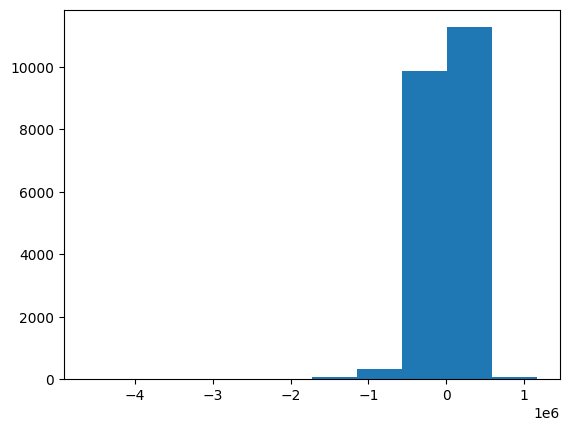

In [77]:
plt.hist(res['error'])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

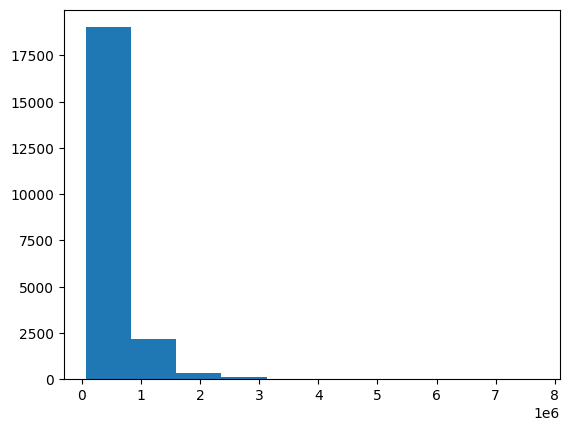

In [78]:
plt.hist(houses['price'])


In [79]:
houses.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.042289
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.201253


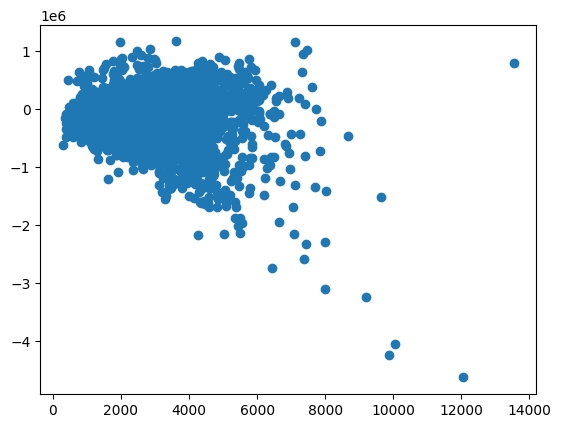

In [80]:
plt.scatter(houses['sqft_living'],res['error'])

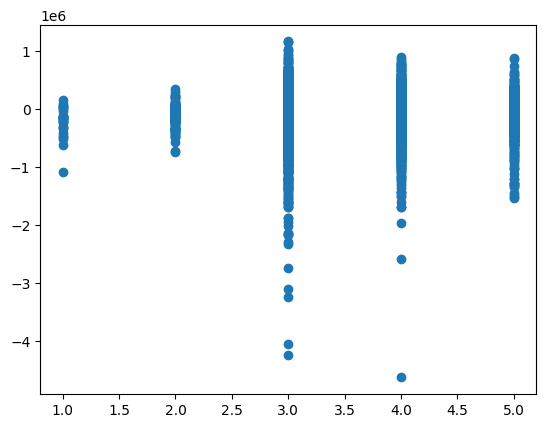

In [81]:
plt.scatter(houses['condition'],res['error'])

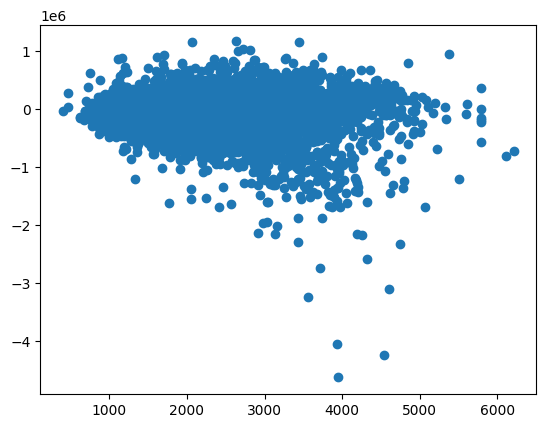

In [82]:
plt.scatter(houses['sqft_living15'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4626262.09395759, -4240853.88523745, -4049125.3408274 , ...,
          1152962.21231646,  1161513.63317209,  1164710.3015098 ])),
 (211360.70379233602, 3.773382678135527e-09, 0.917479002821484))

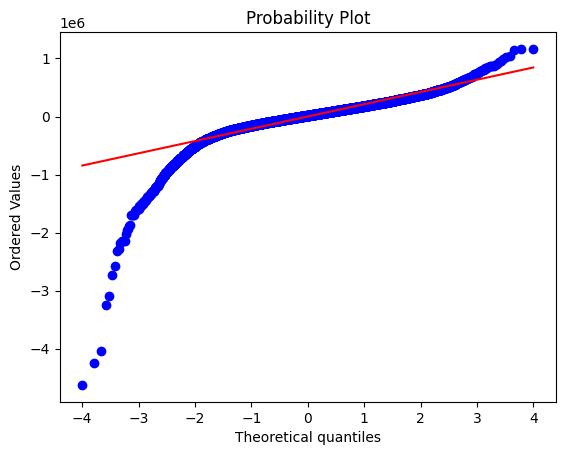

In [83]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [84]:
res

,y_hat,price,error,sq_error
0,290439.646353,221900.0,68539.646353,4.697683e+09
1,535990.457755,538000.0,-2009.542245,4.038260e+06
2,152033.974042,180000.0,-27966.025958,7.820986e+08
3,496653.088831,604000.0,-107346.911169,1.152336e+10
4,477599.017763,510000.0,-32400.982237,1.049824e+09
...,...,...,...,...
21608,417498.232744,360000.0,57498.232744,3.306047e+09
21609,547662.551209,400000.0,147662.551209,2.180423e+10
21610,283508.636792,402101.0,-118592.363208,1.406415e+10
21611,444462.465495,400000.0,44462.465495,1.976911e+09


In [85]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 95 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21613 non-null  int64         
 1   date             21613 non-null  datetime64[ns]
 2   price            21613 non-null  float64       
 3   bedrooms         21613 non-null  int64         
 4   bathrooms        21613 non-null  float64       
 5   sqft_living      21613 non-null  int64         
 6   sqft_lot         21613 non-null  int64         
 7   floors           21613 non-null  float64       
 8   waterfront       21613 non-null  int64         
 9   view             21613 non-null  int64         
 10  condition        21613 non-null  int64         
 11  grade            21613 non-null  int64         
 12  sqft_above       21613 non-null  int64         
 13  sqft_basement    21613 non-null  int64         
 14  yr_built         21613 non-null  int64

In [86]:
daily_dataset = houses.set_index('date').resample("D").agg({'sqft_living':'max','sqft_lot':'max','bedrooms':'mean','price':'sum'})


In [87]:
daily_dataset

,sqft_living,sqft_lot,bedrooms,price
date,,,,
2014-05-02,3660.0,125452.0,3.402985,35258850.0
2014-05-03,2920.0,14054.0,3.000000,1867880.0
2014-05-04,2850.0,9933.0,3.200000,2883450.0
2014-05-05,13540.0,307752.0,3.523810,48798843.0
2014-05-06,4510.0,117612.0,3.493976,44325976.0
...,...,...,...,...
2015-05-23,NaN,NaN,NaN,0.0
2015-05-24,1390.0,6670.0,2.000000,445500.0
2015-05-25,NaN,NaN,NaN,0.0


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [89]:
houses.head(2)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [90]:
categorical_features = ['waterfront','view_score', 'quality_score']
numerical_features = ['sqft_living','sqft_living15', 'bedrooms']
target = 'price'

In [91]:
houses[['waterfront','view_score', 'quality_score','sqft_living','sqft_living15','bedrooms']]


,waterfront,view_score,quality_score,sqft_living,sqft_living15,bedrooms
0,0,Poor View,Average Quality,1180,1340,3
1,0,Poor View,Average Quality,2570,1690,3
2,0,Poor View,Average Quality,770,2720,2
3,0,Poor View,Average Quality,1960,1360,4
4,0,Poor View,Average Quality,1680,1800,3
...,...,...,...,...,...,...
21608,0,Poor View,Average Quality,1530,1530,3
21609,0,Poor View,Average Quality,2310,1830,4
21610,0,Poor View,Average Quality,1020,1020,2
21611,0,Poor View,Average Quality,1600,1410,3


In [92]:
X_train, X_test, y_train, y_test = train_test_split(houses[categorical_features + numerical_features]
                                                    ,houses[target],
                                                    test_size = 0.3, random_state=1234)

In [93]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [94]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [95]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [96]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view_score',
                                                   'quality_score']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'sqft_living15',
                                                   'bedrooms'])])),
                ('regressor', LinearRegression())])

In [97]:
pred = linear_regression.predict(X_test)

In [98]:
pred

array([ 517632.,  617472., 1389440., ...,  671232.,  510848.,  610560.])

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
np.sqrt(mean_squared_error(pred,y_test))

233346.87995758557

In [101]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [102]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view_score',
                                                   'quality_score']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'sqft_living15',
                                                   'bedrooms'])])),
                ('regressor', Ridge(alpha=3.0))])

In [103]:
pred_ridge = ridge_regression.predict(X_test)

In [104]:
np.sqrt(mean_squared_error(pred_ridge,y_test))


233332.88285670598

In [105]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [106]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view_score',
                                                   'quality_score']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'sqft_living15',
                                                   'bedrooms'])])),
                ('regressor', Lasso())])

In [107]:
lasso_pred = lasso_regression.predict(X_test)


In [108]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

233348.12774301117

In [109]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [110]:
elasticnet_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view_score',
                                                   'quality_score']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'sqft_living15',
                                                   'bedrooms'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [111]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [112]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

247790.42271729794

In [113]:
y_test

12432     485000.0
7793      358000.0
13435     716500.0
1821      367500.0
12449     544000.0
           ...    
2596     1065000.0
21161     459990.0
20133     388500.0
11130     530000.0
16762     449400.0
Name: price, Length: 6484, dtype: float64

In [114]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'price'})], axis=1)


In [115]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

In [116]:
X_test

,waterfront,view_score,quality_score,sqft_living,sqft_living15,bedrooms
12432,0,Poor View,Average Quality,2030,2030,3
7793,0,Poor View,Average Quality,2510,1870,3
13435,0,Poor View,Excellent Quality,3630,4440,5
1821,0,Poor View,Average Quality,1660,1320,3
12449,0,Poor View,Average Quality,2030,1780,4
...,...,...,...,...,...,...
2596,0,Poor View,Average Quality,1890,2180,2
21161,0,Poor View,Average Quality,2680,2990,3
20133,0,Poor View,Average Quality,2718,2667,4
11130,0,Poor View,Average Quality,1980,2120,3


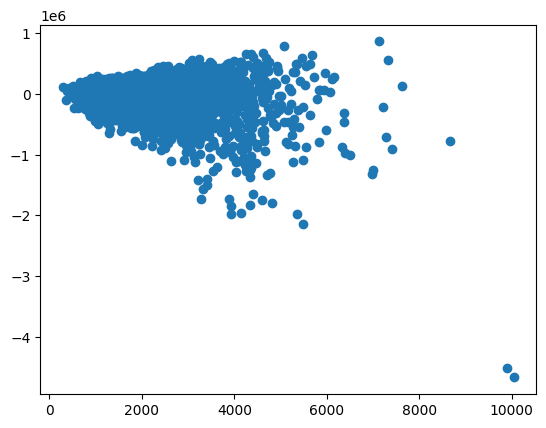

In [117]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sqft_living'],elastic_net_pred['res'])

1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.
You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

I did some feature engineering. 
Firstly, I transformed date column to a datetime data format, which makes the table easy to read. 
Secondly, I converted yr_renovated into a binary variable that clearly marks whether a house has been renovated or not. Thirdly, I created 3 functions to classify good view/poor view, good condition/poor condition and good quality/poor quality in terms of buidling construction and design. Then I created 3 new columns by applying those 3 functions to "view","grade" and "condition" columns. Therefore, I can clearly know how the buidling values in terms of view, conditin and quality. 
Lastly, I created dummy variables for zipcode, which allows me to include geographic location as a factor when analysing the model.

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

I first created a Ordinary Least Squares Regression. An R-squared of 0.606 means that about 60.6% of the variance in house prices is explained by the model. Prob (F-statistic) is zero, which indicates that the model is statistically significant. 

The square footage of living space (sqft_living 196.7127), square footage of interior housing living space for the nearest 15 neighbors (sqft_living15 6.2648), the overall grade given to the housing unit (grade 9.916e+04), waterfront(5.812e+05), view(6.274e+04) and overall condition of the house (condition 5.52e+04) have a positive association with price. This means that as these variables increase, the price of the house tends to increase as well. 
Specifically, 

* For each additional square foot of living space (sqft_living), the price of a house increases by approximately $196.71.
* For each additional square foot in the nearest 15 neighbors (sqft_living15), the price of a house increases by approximately $6.26. However, this variable is not statistically significant at the 5% level as its P-value is 0.094.
* For each additional unit increase in grade (grade), the price of a house increases by approximately $99,160.
* For waterfront houses (waterfront), the price of a house increases by approximately $581,200.
* For each increase in condition (condition), the price of a house increases by approximately $55,200.
* For each increase in view quality (view), the price of a house increases by approximately $62,740.

The number of bedrooms (bedrooms) and bathrooms (bathrooms) and the coefficient for the square footage of the land lots of the nearest 15 neighbors (sqft_lot15), floors have a negative association with price. This suggests that as these variables increase, the price of the house tends to decrease.
Specifically, 

* For each additional bedroom (bedrooms), the price decreases by approximately $34,590.
* For each additional bathroom (bathrooms), the price decreases by approximately $11,820.
* For each additional square foot in lot size of the nearest 15 neighbors (sqft_lot15), the price of a house decreases by approximately $0.76.
* For each additional floor (floors), the price of a house decreases by approximately $13,780.

I calculated the Root Mean Squared Error (RMSE) of the four models(Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net), which is the average squared differences between the predicted and actual values. What I found out is that Ridge is the best model to perform, which got the lowest number 233332.88285670598. The Elastic Net is the worst model to perform, which got the highest number 247790.42271729794.

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

The main drivers of the house prices in King City would be 
1) Size of the Living Space (sqft_living). For each additional square foot of living space, we expect the house price to increase by approximately $219. This suggests that larger houses, in terms of living space, tend to be more expensive. 
2) Grade of the House (grade). For each unit increase in the grade, we expect the house price to increase by roughly $98,430. Therefore, houses of superior quality and design fetch higher prices in the market. 
3) Condition of the House (condition). For each unit increase in the condition (based on a scale), we expect the house price to rise by approximately $65,170. Well-maintained houses with fewer required repairs tend to be more valuable. 
4) Size of Nearby Houses (sqft_living15). For each additional square foot in the average living space of the 15 closest houses, we expect the price of the house in question to increase by approximately $17.77. This suggests that houses in neighborhoods with larger houses (in terms of living space) tend to be more expensive. I think it is because larger houses nearby often indicate a more affluent or desirable area.
